# Load MCMC set up notebook

In [2]:
import os
os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow/MCMC_Refactored_Notebooks')
%run ./MCMC_Method_SyntheticData_95th_mean_IQR.ipynb

boxes().shape[0]
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs 
                                and returns the detrended version of that model output
# getObsIQR(obs): This function takes observations and returns the IQR 
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR
#

# Load Plotting Functions

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
def plotChain(sampler):
    #%% Plot chain results
    fig= plt.figure( figsize=[8,5])
    ax= fig.add_subplot(111)
    res=plt.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
    SPuno_truval = scalors['spun'][0]
    plt.axhline(SPuno_truval, color='blue')
    ax.set_ylabel('Hg$^0$ emissions (Mt yr$^{-1}$)', fontsize = 14)
    ax.set_xlabel('Length of Chains')
    plt.show()

In [4]:
def plotCorner(sampler,title):
    #%% Plot corner plots to visualize 1D and 2D spreads between the parameters we are testing, and get some uncertainties on our paraemter estimations
    True_Emissions = [7.748216414, 11.66649464,1.38677, 13.6339, 18.9904]
    labels = ['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']
    samples = sampler.flatchain
    fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.10, 0.5, 0.90],truths=True_Emissions,truth_color='blue')
    fig.suptitle(title,x=0.6,fontsize=16,fontweight="bold")
    return fig

In [5]:
def plotBox(sampler,title):
    samples = sampler.flatchain
    labels = ['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']
    dfSamples=pd.DataFrame(samples,columns=labels)
    
    fig= plt.figure( figsize=[16,8])
    ax= fig.add_subplot(111)
    bpdict = dfSamples.boxplot(whis=[5, 95], return_type='dict')

    ax.axhline(7.75,xmin=0, xmax=0.20,color = 'blue',label='7.75 Mt')
    ax.axhline(11.66, xmin=0.20, xmax=0.40,color = 'orange',label='11.66 Mt')
    ax.axhline(1.39, xmin=0.40, xmax=0.60,color = 'green',label='1.39 Mt')
    ax.axhline(13.63, xmin=0.6, xmax=0.8,color = 'red',label='13.63 Mt')
    ax.axhline(18.99, xmin=0.80, xmax=1,color = 'darkviolet',label='18.99 Mt')
    ax.legend()
    ax.set_ylabel('Hg$^0$ emissions (Mt yr$^{-1}$)', fontsize = 14)
    ax.set_title(title, fontsize=16,fontweight="bold")
    plt.ylim(-2, 100)
    plt.show()
    return dfSamples,fig

# Invetigations to be carried out description


We are using the MCMC algorithm to figure out the distributions of 5 different parameters using different metrics. The metrics being used to compare the Hg concentrations time series are:
* Mean 
* IQR
* 95th percentile range 

With each of these metrics, we investigate the following:
* The effect of the number of sites used as reference by the algorithm
* The effect of the size of the error

# Comparing the different metrics against each other


## Explaination of Steps

To compare the metrics against each other we need to choose the error that we are going to use and the number of sites.
1. Error=0.00001
2. Number of Sites =5

# Comparison of Metrics

## Create and Save Simulation runs in dictionary

In [ ]:
metrics=['mean','95th','iqr']
error=0.00001
siteNum=5
superdict={}
for metric in metrics:
    model = set_metric(metric)
    ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(siteNum)
    sampler=run_simulation_error(siteNum,metric,error)
    superdict[metric]=sampler

In [6]:
metrics=['mean','95th','iqr']
#error=0.00001
siteNum=5
superdict={}
for metric in metrics:
    model = set_metric(metric)
    ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(siteNum)
    sampler=run_simulation(siteNum,metric)
    superdict[metric]=sampler

model metric is mean
Running burn-in...
Running production...
model metric is 95th percentile
Running burn-in...
Running production...
model metric is IQR
Running burn-in...
Running production...


## Create plots

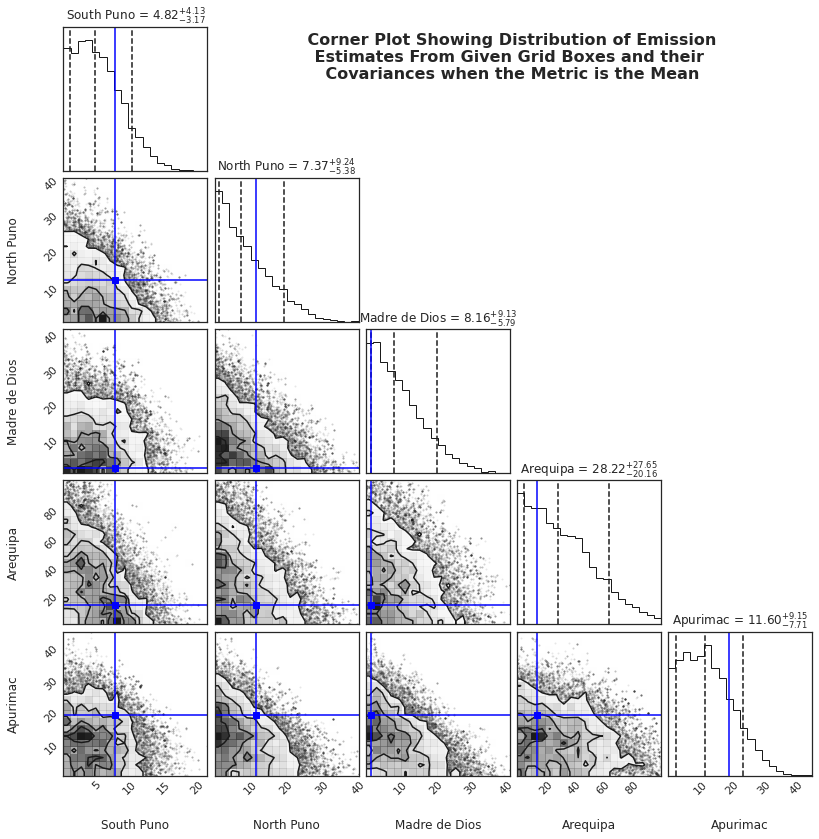

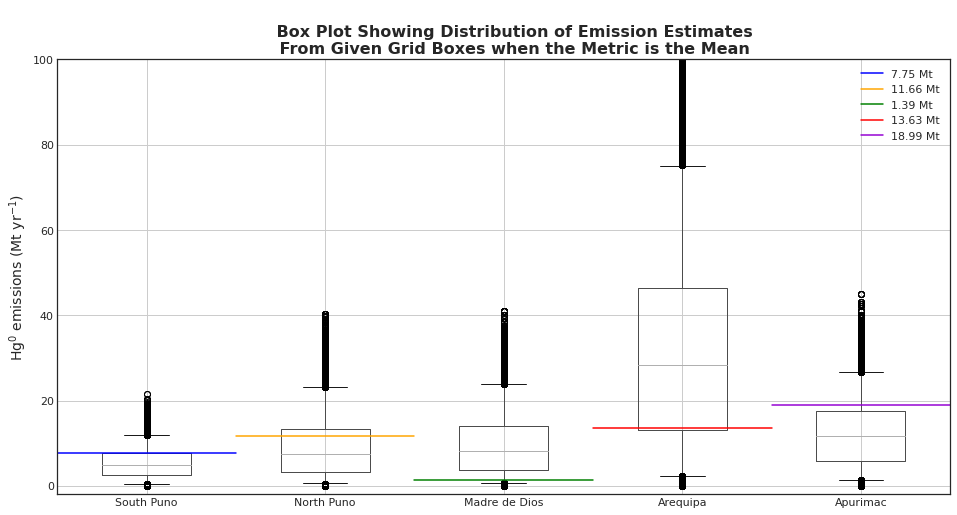

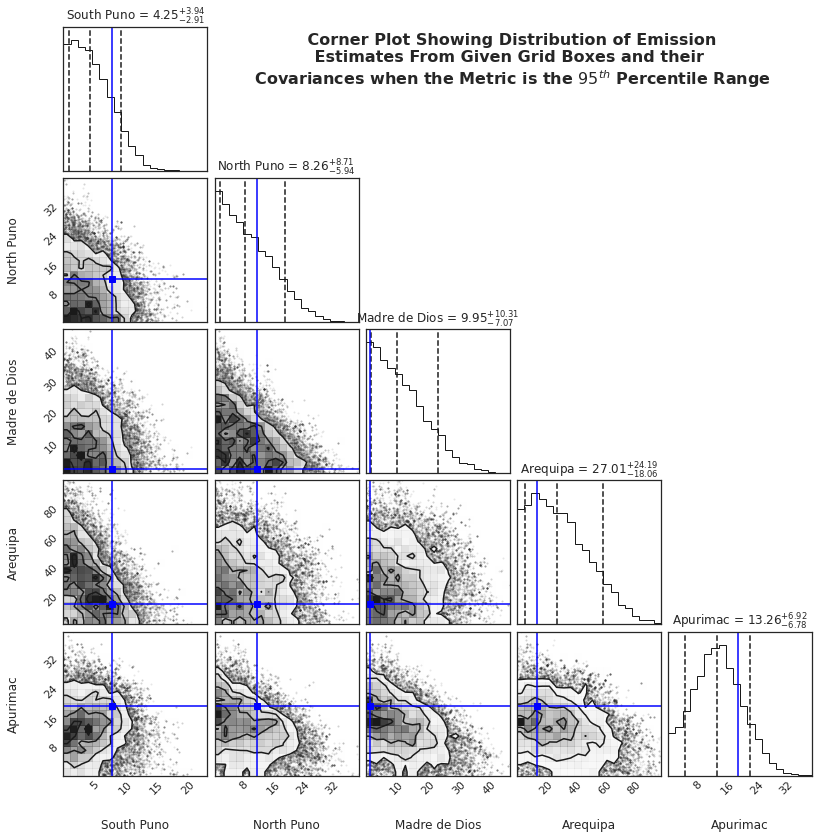

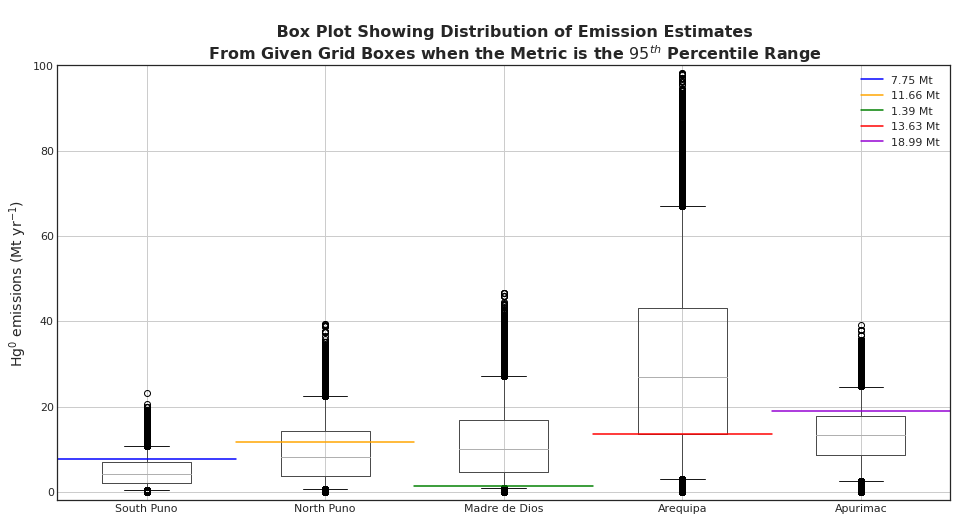

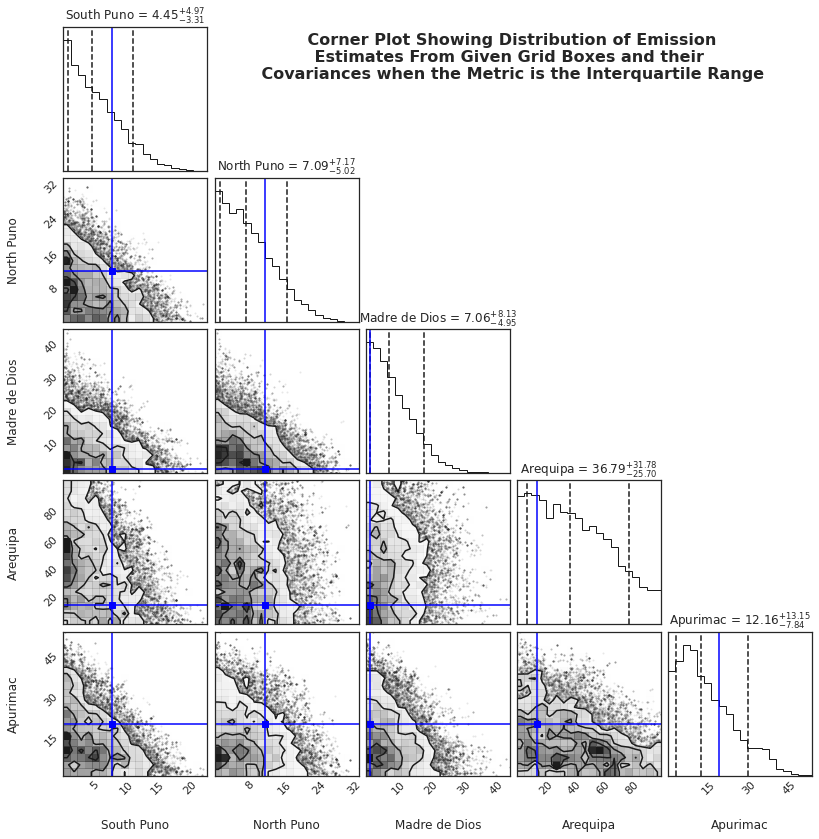

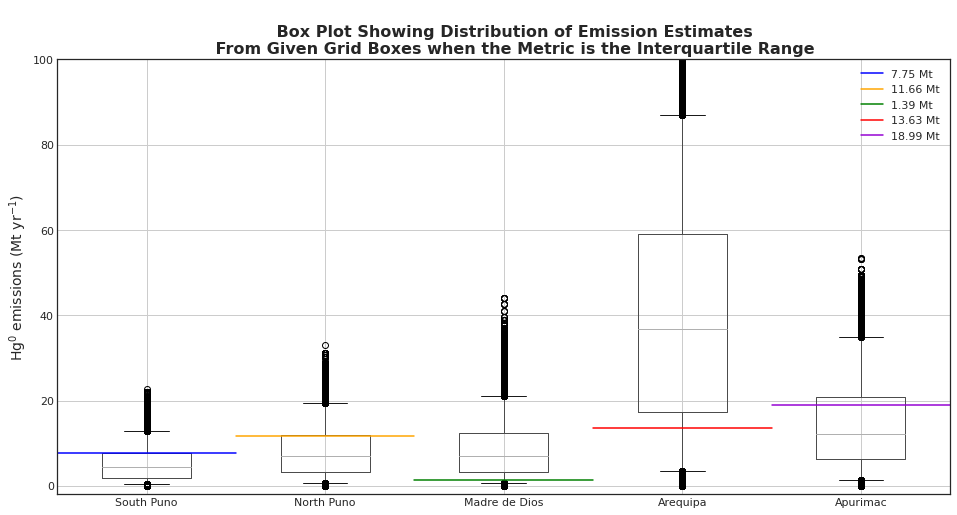

In [7]:
CompareMetric={}

for metric in metrics:
    #set variable componets of plot titles
    if metric=='mean':
        met='Mean'
    elif metric=='95th':
        met= '$95^{th}$ Percentile Range'
    else:
        met= 'Interquartile Range'
    sampler=superdict[metric]
    #create corner plots
    corner_title= '''
    Corner Plot Showing Distribution of Emission
    Estimates From Given Grid Boxes and their 
    Covariances when the Metric is the '''+met
    cornerplot=plotCorner(sampler,corner_title)
    CornerFigName='cornerplot_'+met
    cornerplot.savefig('MCMC_Refactored_Notebooks/plotfigures/'+CornerFigName)
    #create box plots
    box_title= '''
    Box Plot Showing Distribution of Emission Estimates
    From Given Grid Boxes when the Metric is the '''+met    
    dfSamples,boxplot=plotBox(sampler,box_title)
    BoxFigName='boxplot_'+met
    boxplot.savefig('MCMC_Refactored_Notebooks/plotfigures/'+ BoxFigName)
    
    #find absolute mean error between mode of MCMC and the true values 
    df_preVtrue=dfSamples.mode().T
    df_preVtrue['trueVal']=np.array([7.75, 11.67,1.39, 13.63, 18.99])
    df_mse=abs(df_preVtrue['trueVal']-df_preVtrue[0])
    CompareMetric[metric]=df_mse  

## Compare the absolute error

In [8]:
df_CompareMetric=pd.DataFrame(CompareMetric).T
regs=['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']
fig= plt.figure( figsize=[16,8])

err_text=str("{:.2e}".format(error))
Title='''
The Absolute Error Between the Mode of MCMC Emission Estimates vs Type of Metric 
Used for Estimation when 5 Reference Sites are used and the Error is set to:''' + err_text
ax= fig.add_subplot(111)
ax.set_title(Title, size=16,fontweight="bold")
ax.set_ylabel('Mean Absolute Error', fontsize = 14,fontweight="bold")
ax.set_xlabel('Metrics', fontsize = 14,fontweight="bold")
for reg in regs:
    ax.plot(['Mean','$95^{th}$ Percentile Range','IQR'],df_CompareMetric[reg],'P:',ms = 8,label=reg)
ax.legend()
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/plotfigures/synth_metricerror_comparison.png')


NameError: name 'error' is not defined

<Figure size 1152x576 with 0 Axes>

# Create plots showing how the IQR of the posterior emission distibutions change as the error term in the simulation decreases

## Generate simulation results

In [ ]:
data = getBoxesAround(5).values
res = bootstrap((data,), fun_95th)
y_err = (np.array(res.standard_error)).mean()
x=y_err
refsites=5
error_superdict={}
for i in range(10):
    err=str("{:.2e}".format(x))
    print(f"The error in this is run is equivalent to {err} multiplied by 1/2 raised to the power of {i} ")
    metric = '95th'
    model = set_metric(metric)
    ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(refsites)
    sampler=run_simulation_error(refsites,metric,x)
    error_superdict[i]=sampler
    x=0.5*x


## Generate corner plots and box plots 

In [ ]:
rangeVerror={}
for i in range(10):
    sampler=error_superdict[i]
    metric = '95th'
    corner_title= '''
    Corner Plot Showing Distribution of Emission
    Estimates From Given Grid Boxes and their
    Covariances when the Error is: '''+str("{:.2e}".format(x))
    box_title= '''
    Box Plot Showing Distribution of Emission Estimates
    From Given Grid Boxes when the Error is: '''+str("{:.2e}".format(x))
    #plotChain(sampler)
    cornerplot=plotCorner(sampler,corner_title)
    CornerFigName='cornerplot_synth_95th'+str(i)
    cornerplot.savefig('MCMC_Refactored_Notebooks/plotfigures/OptimizationPlots/'+CornerFigName)
    #plot and save boxplot
    df_95th,boxplot=plotBox(sampler,box_title)
    BoxFigName='boxplot_synth_95th'+str(i)
    boxplot.savefig('MCMC_Refactored_Notebooks/plotfigures/OptimizationPlots/'+ BoxFigName)
    
    err_sci=str("{:.2e}".format(x))
    df_preVtrue=df_95th.mode().T
    df_preVtrue['trueVal']= np.array([7.75,11.66,1.39, 13.63,18.99])
    df_abse=abs(df_preVtrue['trueVal']-df_preVtrue[0])
    rangeVerror[err_sci]= df_abse
    #rangeVerror[x]=df.apply(find_iqr)
    x=0.5*x

## Compare the and plot the absolute errors and how they change with the change in the mcmc error

In [ ]:
df_rangeVerror=pd.DataFrame(rangeVerror).T  
df_error=df_rangeVerror.reset_index()
fig= plt.figure( figsize=[16,8])
ax= fig.add_subplot(111)
df_error[['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']].plot(ax=ax)
xtics=list(df_error['index'])


Title='''
How the Absolute Error Between the Mode of MCMC Emission Estimates and the GMA 2018 
Emissions Inventory Estimates changes as the Error used in the MCMC Run when the Metric is the $95^{th}$ Percentile Range'''

ax.legend()
ax.set_ylabel('Absolute Error', fontsize = 14,fontweight="bold")
ax.set_xlabel('Error Used in MCMC Run', fontsize = 14,fontweight="bold")
ax.set_title(Title, size=18,fontweight="bold")
ax.set_xticks(list(range(len(xtics))))
ax.set_xticklabels(xtics)
plt.ylim(-2, 17)
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/plotfigures/synth_95thErrorChangeVabsError.png')

# Create plot summary plot showing how the IQR of the posterior emission distibutions change as the number of sites used in the simulation increases

In [ ]:
x=0.00001
#define function to calculate interquartile range

RangeVsiteNum={}
for i in range(10):
    print(i)
    print("The number of sites in this is run in: ",(i+1))
    metric = '95th'
    corner_title= 'Corner Plot Showing Distribution of Emission \nEstimates From Given Grid Boxes and their \nCovariances when the Number of Refference Sites is: '+str(i+1)
    box_title= 'Box Plot Showing Distribution of Emission Estimates\nFrom Given Grid Boxes when the Number of Refference Sites is: '+str(i+1)
    
    model = set_metric(metric)
    ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(i)
    sampler=run_simulation_error(i,metric,x)
    #plotChain(sampler)
    plotCorner(sampler,corner_title)
    df_range=plotBox(sampler,box_title)
    RangeVsiteNum[i]=df_range.apply(find_iqr)
    #x=0.5*x

In [ ]:
df_RangeVsiteNum=pd.DataFrame(RangeVsiteNum).T  
df_siteNum=df_RangeVsiteNum.reset_index()
fig= plt.figure( figsize=[16,8])
ax= fig.add_subplot(111)
df_siteNum[['South Puno','North Puno','Madre de Dios','Arequipa','Apurimac']].plot(ax=ax)
ax.legend()
ax.set_ylabel('IQR', fontsize = 14)
ax.set_xlabel('Number of Refference Sites', fontsize = 14)
ax.set_title('The IQR of Emission Distributions Estimates Decreases as the Number of Refference Sites', size=18,fontweight="bold")
ax.set_xticks(list(range(10)))
ax.set_xticklabels(list(range(1,11)))
plt.show()

# Comparing time series

In [ ]:
8.84e-06